# __Group 19__

>### _Ajay Athitya Ramanathan_
>### _Sisir Pasumarti_

## Exploratory Analysis of Credit Card Applications

In [76]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

> Loading the Applications dataset

|Feature name	|Explanation|
|---------------|-----------|
|ID|	Client number|
|CODE_GENDER| Gender	|
|FLAG_OWN_CAR|	Is there a car	|
|FLAG_OWN_REALTY|	Is there a property	|
|CNT_CHILDREN|	Number of children	|
|AMT_INCOME_TOTAL|	Annual income	|
|NAME_INCOME_TYPE|	Income category	|
|NAME_EDUCATION_TYPE|	Education level	|
|NAME_FAMILY_STATUS|	Marital status	|
|NAME_HOUSING_TYPE|	Way of living	|
|DAYS_BIRTH	Birthday|	Count backwards from current day (0), -1 means yesterday|
|DAYS_EMPLOYED|	Start date of employment	Count backwards from current day(0). If positive, it means the person currently unemployed.|
|FLAG_MOBIL|	Is there a mobile phone	|
|FLAG_WORK_PHONE|	Is there a work phone	FLAG_PHONE	Is there a phone|	
|FLAG_EMAIL|	Is there an email|	
|OCCUPATION_TYPE|	Occupation|
|CNT_FAM_MEMBERS|	Family size|

In [77]:
df = pd.read_csv("application_record.csv") 
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


- Identifying NULL values

In [78]:
df.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

- Since we have Income and Type of Income we drop 'OCCUPATION_TYPE'. It has around 30% NULL Values

In [79]:
df.drop(columns = ['OCCUPATION_TYPE'],inplace=True)

> ### Visualizations

- Pie Plot for Gender Ratio : Around 67% are women

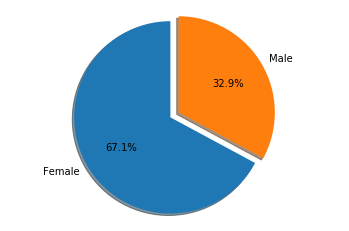

In [80]:
gender = df.groupby('CODE_GENDER').count()['ID']
labels = 'Female', 'Male'
sizes = [gender[0],gender[1]]
explode = (0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

- Pie Plot showing people with cars : Around 63% own a car

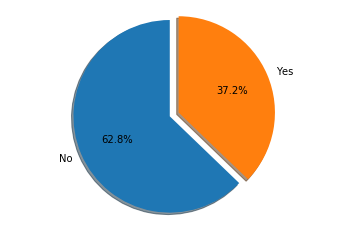

In [81]:
own_car = df.groupby('FLAG_OWN_CAR').count()['ID']
labels = 'No', 'Yes'
sizes = [own_car[0],own_car[1]]
explode = (0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

- Pie Plot showing people with own properties: Around 70% own a property

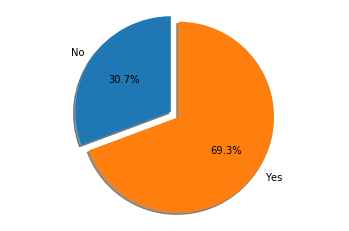

In [82]:
own_realty = df.groupby('FLAG_OWN_REALTY').count()['ID']
labels = 'No', 'Yes'
sizes = [own_realty[0],own_realty[1]]
explode = (0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

 - Hitogram showing count of Children in a Family: Around 300,000 families has no children

In [83]:
count_children = df.groupby('CNT_CHILDREN').count()['ID']
count_children[5] = df[df['CNT_CHILDREN']>=5].count()['ID']
count_children = count_children[0:6]
count_children = list(count_children.values)
count_children

[304071, 88527, 39884, 5430, 486, 159]

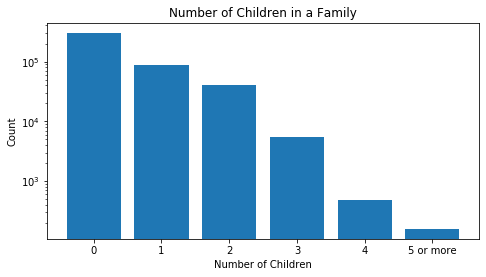

In [84]:
fig = plt.figure(figsize=(6,3))
ax = fig.add_axes([0,0,1,1])
category = ['0', '1', '2', '3', '4',  '5 or more']
count = count_children
ax.bar(category,count)
ax.set_xlabel("Number of Children")
ax.set_ylabel("Count")
ax.set_yscale("log")
ax.set_title("Number of Children in a Family")
plt.show()

- Box Plot showing the distribution of Total Income of the applicants : So many outliers are present which must be removed before training

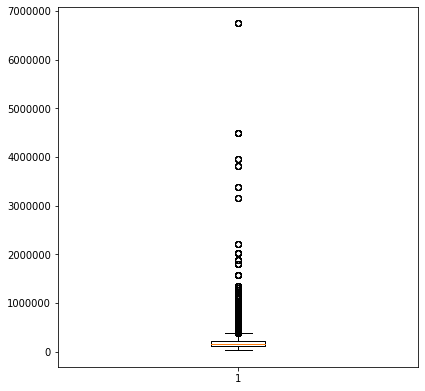

In [85]:
data = list(df['AMT_INCOME_TOTAL'].values)
fig = plt.figure(figsize =(5, 5))
ax = fig.add_axes([0, 0, 1, 1]) 
bp = ax.boxplot(data) 
plt.show()

In [86]:
mean = df['AMT_INCOME_TOTAL'].mean()
mini = df['AMT_INCOME_TOTAL'].min()
one = df['AMT_INCOME_TOTAL'].quantile([0.25])
median = df['AMT_INCOME_TOTAL'].quantile([0.5])
third = df['AMT_INCOME_TOTAL'].quantile([0.75])
maxi = df['AMT_INCOME_TOTAL'].max()

In [87]:
print("Mean = {}\nMinimum = {}\n1st Quartile = {}\nMedian = {}\n3rd Quartile = {}\nMaximum = {}".format(mean,mini,one.values[0],median.values[0],third.values[0],maxi))

Mean = 187524.28600950394
Minimum = 26100.0
1st Quartile = 121500.0
Median = 160780.5
3rd Quartile = 225000.0
Maximum = 6750000.0


- Graph showing Number of people in different Income Categories

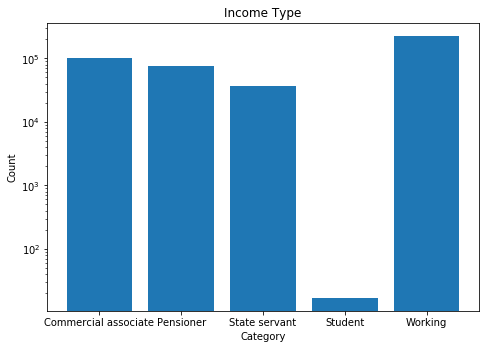

In [88]:
fig = plt.figure()
income_type = df.groupby("NAME_INCOME_TYPE").count()["ID"]
ax = fig.add_axes([0,0,1,1])
category = list(income_type.index)
count = list(income_type.values)
ax.bar(category,count)
ax.set_xlabel("Category")
ax.set_ylabel("Count")
ax.set_yscale('log')
ax.set_title("Income Type")
plt.show()

- Graph showing Number of people in different levels of Education

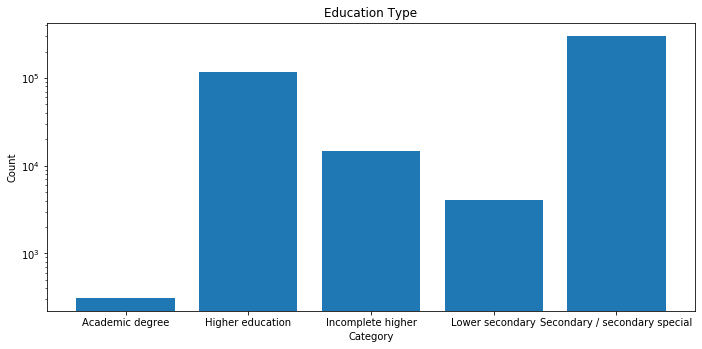

In [89]:
fig = plt.figure(figsize=(9,4))
income_type = df.groupby("NAME_EDUCATION_TYPE").count()["ID"]
ax = fig.add_axes([0,0,1,1])
category = list(income_type.index)
count = list(income_type.values)
ax.bar(category,count)
ax.set_xlabel("Category")
ax.set_ylabel("Count")
ax.set_yscale('log')
ax.set_title("Education Type")
plt.show()

- Pie Chart showing distribution of Family Statuses

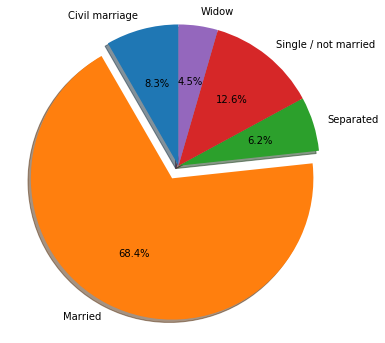

In [90]:
family_type = df.groupby("NAME_FAMILY_STATUS").count()["ID"]
labels = list(family_type.index)
sizes = list(family_type.values)
explode = (0, 0.1,0,0,0)
fig1, ax1 = plt.subplots(figsize=(6,6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

- Graph showing Number of people in different Housing types

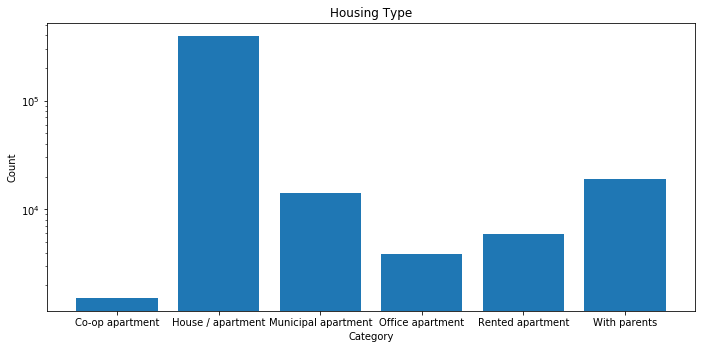

In [91]:
house_type = df.groupby("NAME_HOUSING_TYPE").count()["ID"]
fig = plt.figure(figsize=(9,4))
ax = fig.add_axes([0,0,1,1])
category = list(house_type.index)
count = list(house_type.values)
ax.bar(category,count)
ax.set_xlabel("Category")
ax.set_ylabel("Count")
ax.set_yscale('log')
ax.set_title("Housing Type")
plt.show()

- Graph showing number of members in the family of the applicants

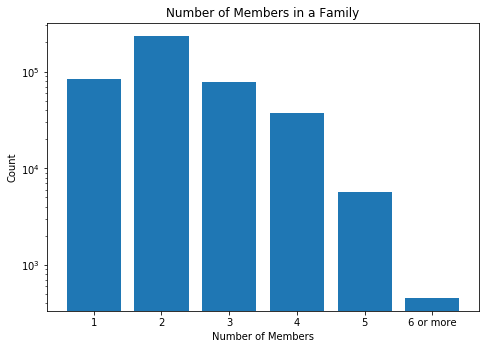

In [92]:
count_fam = df.groupby('CNT_FAM_MEMBERS').count()['ID']
count_fam[5] = df[df['CNT_FAM_MEMBERS']>=5].count()['ID']
count_fam = count_fam[0:6]
count_fam = list(count_fam.values)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
category = ['1', '2', '3', '4',  '5', '6 or more']
count = count_fam
ax.bar(category,count)
ax.set_xlabel("Number of Members")
ax.set_ylabel("Count")
ax.set_yscale('log')
ax.set_title("Number of Members in a Family")
plt.show()

- Heatmap showing Correlation of each numerical variable with respect to Status

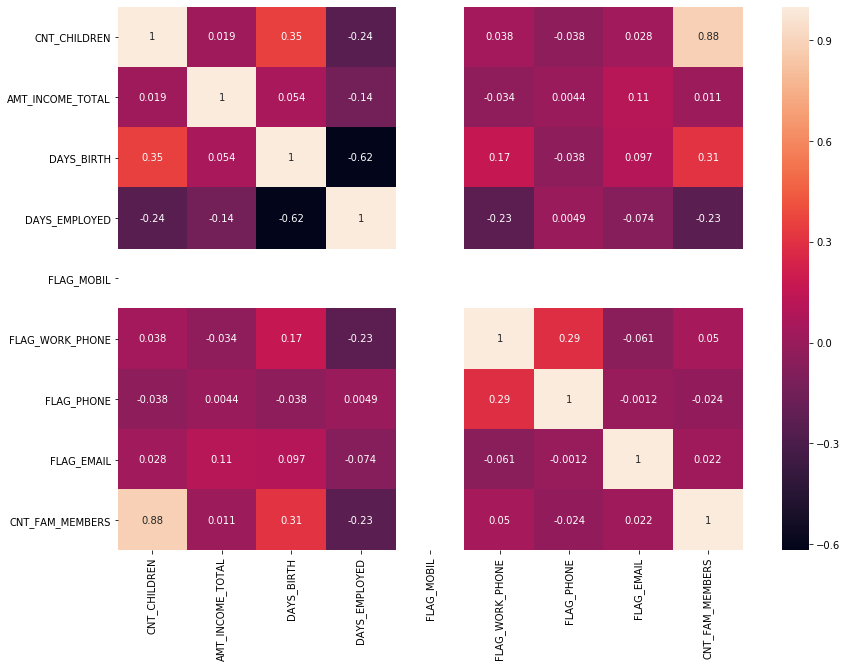

In [93]:
plt.figure(figsize=(14,10))
corr = df.drop(columns=['ID']).corr()
map = sns.heatmap(corr, annot=True)
plt.savefig('heatmap.png')

- 'FLAG_MOBIL' has value 1 across all the rows meaning everyone owns a mobile. Since it doesn't contribute to decision making we drop that column

In [94]:
df['FLAG_MOBIL'].unique()

array([1], dtype=int64)

In [95]:
df.drop(columns=['FLAG_MOBIL'],inplace=True)

> ### Data Wrangling

#### Removing Outliers

 We wont be using the general rule of eliminating anything beyond 3 X standard deviation because in CNT_CHILDREN the mean is ~0.45 because many families doesn't have children. The upper limit turns out to be 2 which may lead to deleting valuable data. Instead we remove the extreme outliers which are the top and bottom 0.1% of data. 

In [96]:
upper = df['CNT_CHILDREN'].quantile(0.999)
lower = df['CNT_CHILDREN'].quantile(0.001)
df = df[(df['CNT_CHILDREN']>lower) & (df['CNT_CHILDREN']<upper)]

upper = df['AMT_INCOME_TOTAL'].quantile(0.999)
lower = df['AMT_INCOME_TOTAL'].quantile(0.001)
df = df[(df['AMT_INCOME_TOTAL']>lower) & (df['AMT_INCOME_TOTAL']<upper)]

upper = df['CNT_FAM_MEMBERS'].quantile(0.999)
lower = df['CNT_FAM_MEMBERS'].quantile(0.001)
df = df[(df['CNT_FAM_MEMBERS']>lower) & (df['CNT_FAM_MEMBERS']<upper)]

#### Encoding and Creating Dummy Variables

- Transforming categorical variables into numerical values

In [97]:
for x in df:
    if df[x].dtypes=='object':
        print (x)

CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE


In [98]:
it = pd.get_dummies(df['NAME_INCOME_TYPE'])
df.drop('NAME_INCOME_TYPE',axis=1,inplace=True)
et = pd.get_dummies(df['NAME_EDUCATION_TYPE'])
df.drop('NAME_EDUCATION_TYPE',axis=1,inplace=True)
fs = pd.get_dummies(df['NAME_FAMILY_STATUS'])
df.drop('NAME_FAMILY_STATUS',axis=1,inplace=True)
ht = pd.get_dummies(df['NAME_HOUSING_TYPE'])
df.drop('NAME_HOUSING_TYPE',axis=1,inplace=True)

In [99]:
le = LabelEncoder()
for x in df:
    if df[x].dtypes=='object':
        df[x] = le.fit_transform(df[x])
cg = df['CODE_GENDER']
df.drop('CODE_GENDER',axis=1,inplace=True)
foc = df['FLAG_OWN_CAR']
df.drop('FLAG_OWN_CAR',axis=1,inplace=True)
fore = df['FLAG_OWN_REALTY']
df.drop('FLAG_OWN_REALTY',axis=1,inplace=True)
df.head()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
29,5008838,1,405000.0,-11842,-2016,0,0,0,3.0
30,5008839,1,405000.0,-11842,-2016,0,0,0,3.0
31,5008840,1,405000.0,-11842,-2016,0,0,0,3.0
32,5008841,1,405000.0,-11842,-2016,0,0,0,3.0
33,5008842,1,405000.0,-11842,-2016,0,0,0,3.0


> Loading the Credit Record Dataset

|Feature name|	Explanation	Remarks|
|------------|---------------------|
|ID	|Client number	|
|MONTHS_BALANCE|	Record month	The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on|
|STATUS|
0: 1-29 days past due 
        1: 30-59 days past due 
        2: 60-89 days overdue 
        3: 90-119 days overdue 
        4: 120-149 days overdue 
        5: Overdue or bad debts, write-offs for more than 150 days 
        C: paid off that month 
        X: No loan for the month|

In [100]:
cr = pd.read_csv("credit_record.csv") 
cr.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


- Multiplying by -1 for sorting in ascending order according to months

In [101]:
cr['MONTHS'] = cr['MONTHS_BALANCE']*-1
cr = cr.sort_values(['ID','MONTHS'], ascending=True)
cr.head()

,ID,MONTHS_BALANCE,STATUS,MONTHS
0,5001711,0,X,0
1,5001711,-1,0,1
2,5001711,-2,0,2
3,5001711,-3,0,3
4,5001712,0,C,0


In [102]:
cr.groupby('STATUS').count()["ID"]

STATUS
0    383120
1     11090
2       868
3       320
4       223
5      1693
C    442031
X    209230
Name: ID, dtype: int64

- Combining catefory X, C into 0 (On-time) and 1,2,3,4,5 into 1(Defaulters)

In [103]:
cr['STATUS'].replace({'C': 0, 'X' : 0}, inplace=True)
cr['STATUS'] = cr['STATUS'].astype('int')
cr['STATUS'] = cr['STATUS'].apply(lambda x:1 if x >= 1 else 0)
cr.groupby('STATUS').count()["ID"]

STATUS
0    1034381
1      14194
Name: ID, dtype: int64

- Combining multiple records of the customer into 1 
- status = 1: if defaulter in any one month, status = 0 if on-time every month

In [104]:
cr = cr.groupby('ID').agg(max).reset_index()
cr.head() 

,ID,MONTHS_BALANCE,STATUS,MONTHS
0,5001711,0,0,3
1,5001712,0,0,18
2,5001713,0,0,21
3,5001714,0,0,14
4,5001715,0,0,59


- Combining Application and Credit Record Dataframes

In [105]:
df = pd.concat([df,it],axis=1)
df = pd.concat([df,et],axis=1)
df = pd.concat([df,fs],axis=1)
df = pd.concat([df,ht],axis=1)
df = pd.concat([df,cg],axis=1)
df = pd.concat([df,foc],axis=1)
df = pd.concat([df,fore],axis=1)

In [106]:
cr.drop(columns=["MONTHS_BALANCE","MONTHS"],inplace=True)

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,Commercial associate,...,Co-op apartment,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,STATUS
29,5008838,1,405000.0,-11842,-2016,0,0,0,3.0,1,...,0,1,0,0,0,0,1,0,1,0
30,5008839,1,405000.0,-11842,-2016,0,0,0,3.0,1,...,0,1,0,0,0,0,1,0,1,0
31,5008840,1,405000.0,-11842,-2016,0,0,0,3.0,1,...,0,1,0,0,0,0,1,0,1,0
32,5008841,1,405000.0,-11842,-2016,0,0,0,3.0,1,...,0,1,0,0,0,0,1,0,1,0
33,5008842,1,405000.0,-11842,-2016,0,0,0,3.0,1,...,0,1,0,0,0,0,1,0,1,0


In [199]:
finaldf = df.join(cr.set_index('ID'), on='ID', how='inner')
finaldf.head()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,Commercial associate,...,Co-op apartment,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,STATUS
29,5008838,1,405000.0,-11842,-2016,0,0,0,3.0,1,...,0,1,0,0,0,0,1,0,1,0
30,5008839,1,405000.0,-11842,-2016,0,0,0,3.0,1,...,0,1,0,0,0,0,1,0,1,0
31,5008840,1,405000.0,-11842,-2016,0,0,0,3.0,1,...,0,1,0,0,0,0,1,0,1,0
32,5008841,1,405000.0,-11842,-2016,0,0,0,3.0,1,...,0,1,0,0,0,0,1,0,1,0
33,5008842,1,405000.0,-11842,-2016,0,0,0,3.0,1,...,0,1,0,0,0,0,1,0,1,0


In [200]:
x = finaldf.iloc[:,1:9]
y = finaldf.iloc[:,-1]

#### Standardizing the Dataset

- Standardizing all the Input variables to reduce bias

In [201]:
ss = StandardScaler()
x = pd.DataFrame(ss.fit_transform(x), columns=x.columns)

In [202]:
new_x= finaldf[['Commercial associate', 'Pensioner', 'State servant', 'Student',
       'Working', 'Academic degree', 'Higher education', 'Incomplete higher',
       'Lower secondary', 'Secondary / secondary special', 'Civil marriage',
       'Married', 'Separated', 'Single / not married', 'Widow',
       'Co-op apartment', 'House / apartment', 'Municipal apartment',
       'Office apartment', 'Rented apartment', 'With parents', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']]

In [203]:
finalx = np.hstack((x,new_x))
x = pd.DataFrame(data=finalx, columns = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS','Commercial associate', 'Pensioner', 'State servant', 'Student',
       'Working', 'Academic degree', 'Higher education', 'Incomplete higher',
       'Lower secondary', 'Secondary / secondary special', 'Civil marriage',
       'Married', 'Separated', 'Single / not married', 'Widow',
       'Co-op apartment', 'House / apartment', 'Municipal apartment',
       'Office apartment', 'Rented apartment', 'With parents', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY'])

#### Partitioning the Dataset


- Splitting Dataset into Train, Test samples

In [204]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

In [205]:
print("Size of Training Data: {}\nSize of Testing Data = {}".format(len(x_train),len(x_test)))

Size of Training Data: 6661
Size of Testing Data = 2855


- Distribution of response variable : The dataset is imbalanced we must oversample status=1 by random resampling before training

In [206]:
print(y_train.value_counts(normalize=True))

0    0.876295
1    0.123705
Name: STATUS, dtype: float64


#### Oversampling

In [207]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_balanced, y_balanced = oversample.fit_resample(x_train, y_train)
x_test_balanced, y_test_balanced = oversample.fit_resample(x_test, y_test)

In [245]:
print("Training Data:")
print(y_balanced.value_counts(normalize=True))
print("Testing Data:")
print(y_test_balanced.value_counts(normalize=True))

Training Data:
1    0.5
0    0.5
Name: STATUS, dtype: float64
Testing Data:
1    0.5
0    0.5
Name: STATUS, dtype: float64


* The oversampling issue has been fixed as we can see balanced target values in both training and testing data.

#### PCA

* Running PCA with 95% information retention

In [209]:
pca = PCA(.95)
pca.fit(x_balanced)
x_train_pca = pca.transform(x_balanced)
x_test_pca = pca.transform(x_test_balanced)

>### Training and Validation

- In the training phase we initially consider multiple classification models and select the best model using the validation data for final implementation.

#### 1. Logistic Regression

* Without PCA

In [227]:
train_scores = []
test_scores = []

logwpca = LogisticRegression()
print("Logistic Regression without PCA\n")
logwpca.fit(x_balanced, y_balanced)
train_score = logwpca.score(x_balanced, y_balanced)
train_scores.append(train_score)
test_score = logwpca.score(x_test_balanced, y_test_balanced)
y_prediction = logwpca.predict(x_test_balanced)
test_scores.append(test_score)
print("Training Accuracy: ",str(round(train_score*100,2))+"%")
print("Test Accuracy: ",str(round(test_score*100,2))+"%\n")
print("Classification Report:")
print(classification_report(y_test_balanced, y_prediction))

Logistic Regression without PCA

Training Accuracy:  58.38%
Test Accuracy:  58.43%

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.56      0.58      2534
           1       0.58      0.61      0.59      2534

    accuracy                           0.58      5068
   macro avg       0.58      0.58      0.58      5068
weighted avg       0.58      0.58      0.58      5068



C:\Users\ajaya\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


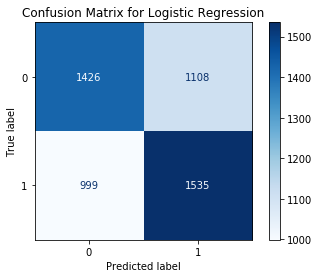

In [211]:
disp = plot_confusion_matrix(classifier, x_test_balanced, y_test_balanced, display_labels=[0,1],cmap=plt.cm.Blues,normalize=None)
disp.ax_.set_title("Confusion Matrix for Logistic Regression")
plt.show()

The classification accuracy is very low in both training and testing data. There is a good balance between sensitivity and specificity. Logically this is a negative because in the original population
only 12% of the records were defaulters but, our model predicts ~55% as quality customers and ~45% as defaulters. The total misclassification rate is 41.04%. Since we have oversampled the data we need to reduce its effect to understand the model's true nature.


##### Adjusted Classification Report for Logistic Regression:

                                                                              Predicted label
| |0|1|Total|
|-------|--------|------|-----|
|0|2546.43|178.57|4525|
|1|240.14|368.99|609.13.7|
| Total|||5134.13|


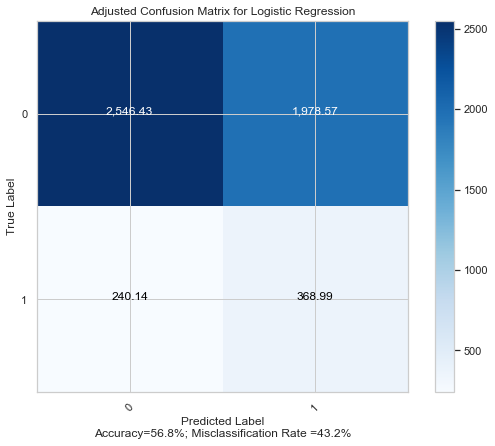

In [252]:
plot_confusion_matrix1(cm           = np.array([[2546.43,1978.57],
                                                [240.14,368.99]]), 
                       
                      normalize    = False,
                      target_names = ['0','1'],
                      title        = "Adjusted Confusion Matrix for Logistic Regression")

The adjusted misclassification rate is 43.2% which is still a huge number and not suitable for practical usage. The model ends up classifying (1978.57+368.99)/5134 = 45.7% of the records as defaulters where we assume only 12% defaulters in the whole population.

* With PCA

In [228]:
train_scores = []
test_scores = []

logpca = LogisticRegression()
print("Logistic Regression with PCA\n")
logpca.fit(x_train_pca, y_balanced)
train_score = logpca.score(x_train_pca, y_balanced)
train_scores.append(train_score)
test_score =logpca.score(x_test_pca, y_test_balanced)
y_prediction = logpca.predict(x_test_pca)
test_scores.append(test_score)
print("Training Accuracy: ",str(round(train_score*100,2))+"%")
print("Test Accuracy: ",str(round(test_score*100,2))+"%\n")
print("Classification Report:")
print(classification_report(y_test_balanced, y_prediction))

Logistic Regression with PCA

Training Accuracy:  55.58%
Test Accuracy:  54.79%

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.52      0.53      2534
           1       0.55      0.58      0.56      2534

    accuracy                           0.55      5068
   macro avg       0.55      0.55      0.55      5068
weighted avg       0.55      0.55      0.55      5068



#### 2. k-Nearest Neighbor Classifier

* Without PCA

In [229]:
knnwpca = KNeighborsClassifier()
print("K-Nearest Neighbors Classifier without PCA\n")
knnwpca.fit(x_balanced, y_balanced)
train_score = knnwpca.score(x_balanced, y_balanced)
train_scores.append(train_score)
test_score = knnwpca.score(x_test_balanced, y_test_balanced)
y_prediction = knnwpca.predict(x_test_balanced)
test_scores.append(test_score)
print("Training Accuracy: ",str(round(train_score*100,2))+"%")
print("Test Accuracy: ",str(round(test_score*100,2))+"%\n")
print("Classification Report:")
print(classification_report(y_test_balanced, y_prediction))

K-Nearest Neighbors Classifier without PCA

Training Accuracy:  89.94%
Test Accuracy:  74.94%

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.84      0.77      2534
           1       0.80      0.66      0.73      2534

    accuracy                           0.75      5068
   macro avg       0.76      0.75      0.75      5068
weighted avg       0.76      0.75      0.75      5068



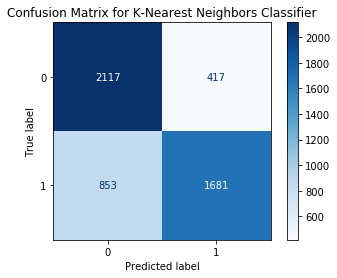

In [215]:
disp = plot_confusion_matrix(classifier, x_test_balanced, y_test_balanced, display_labels=[0,1],cmap=plt.cm.Blues,normalize=None)
disp.ax_.set_title("Confusion Matrix for K-Nearest Neighbors Classifier")
plt.show()

The K-Nearest Neighbors classifier performed better than the logistic regression model in terms of classification accuracy. There is also a correct imbalance between sensitivity and specificity. 
The model misclassifies more quality customers as defaulters rather than defaulters as quality customers. The total misclassification rate is 24.73%. To reduce oversampling effect we have,

##### Adjusted classification Report for k-Nearest Neighbors:

                                                                                Predicted label
| |0|1|Total|
|-------|--------|------|-----|
|0|3780.35|744.64|4525|
|1|205.04|404.08|609.12|
| Total|||5134|

The adjusted misclassification rate is 18.49% which is far better when compared to logistic regression. The model ends up classifying only (744+404)/5134 = 21.7% of the records as defaulters where we assume 12% defaulters.

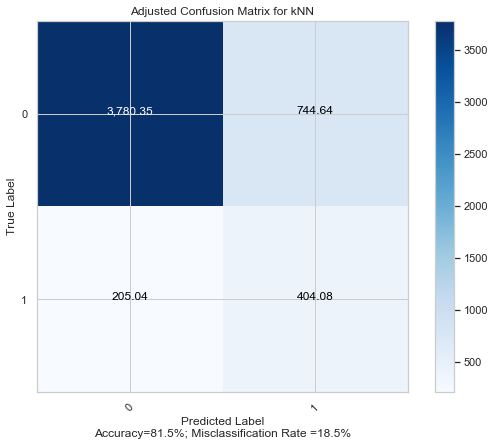

In [256]:
plot_confusion_matrix1(cm           = np.array([[3780.35,744.64],
                                                [205.04,404.08]]), 
                      normalize    = False,
                      target_names = ['0','1'],
                      title        = "Adjusted Confusion Matrix for kNN")

* With PCA

In [230]:
knnpca = KNeighborsClassifier()
print("K-Nearest Neighbors Classifier with PCA\n")
knnpca.fit(x_train_pca, y_balanced)
train_score = knnpca.score(x_train_pca, y_balanced)
train_scores.append(train_score)
test_score = knnpca.score(x_test_pca, y_test_balanced)
y_prediction = knnpca.predict(x_test_pca)
test_scores.append(test_score)
print("Training Accuracy: ",str(round(train_score*100,2))+"%")
print("Test Accuracy: ",str(round(test_score*100,2))+"%\n")
print("Classification Report:")
print(classification_report(y_test_balanced, y_prediction))

K-Nearest Neighbors Classifier with PCA

Training Accuracy:  89.8%
Test Accuracy:  74.13%

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.83      0.76      2534
           1       0.79      0.65      0.72      2534

    accuracy                           0.74      5068
   macro avg       0.75      0.74      0.74      5068
weighted avg       0.75      0.74      0.74      5068



#### 3. Decision Tree Classifier

* Without PCA

In [231]:
dtreewpca = DecisionTreeClassifier()
print("Decision Tree Classifier without PCA\n")
dtreewpca.fit(x_balanced, y_balanced)
train_score = dtreewpca.score(x_balanced, y_balanced)
train_scores.append(train_score)
test_score = dtreewpca.score(x_test_balanced, y_test_balanced)
y_prediction = dtreewpca.predict(x_test_balanced)
test_scores.append(test_score)
print("Training Accuracy: ",str(round(train_score*100,2))+"%")
print("Test Accuracy: ",str(round(test_score*100,2))+"%\n")
print("Classification Report:")
print(classification_report(y_test_balanced, y_prediction))

Decision Tree Classifier without PCA

Training Accuracy:  94.97%
Test Accuracy:  83.23%

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.91      0.84      2534
           1       0.89      0.76      0.82      2534

    accuracy                           0.83      5068
   macro avg       0.84      0.83      0.83      5068
weighted avg       0.84      0.83      0.83      5068



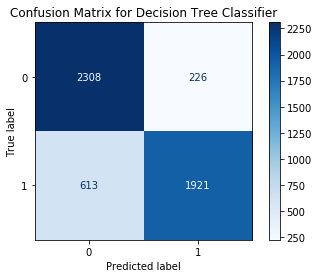

In [219]:
disp = plot_confusion_matrix(classifier, x_test_balanced, y_test_balanced, display_labels=[0,1],cmap=plt.cm.Blues,normalize=None)
disp.ax_.set_title("Confusion Matrix for Decision Tree Classifier")
plt.show()

The Decision Tree classifier outperforms both logistic regression model as well as kNN model in terms of classification accuracy. There is a correct imbalance between sensitivity and specificity 
which is an advantage. The total misclassification rate is 16.3%. By reducing the oversampling effect we have, 

##### Adjusted Classification Report for Decision Tree Classifier:

                                                                             Predicted label
| |0|1|Total|
|-------|--------|------|-----|
|0|4121.42|403.57|4525|
|1|147.35|461.77|609.13|
| Total|||5134|

The adjusted misclassification rate is 10.7% which is the best among all the other models. The model ends up classifying only (403+461)/5134 = 16.85% of the records as defaulters where we assume 12% defaulters.

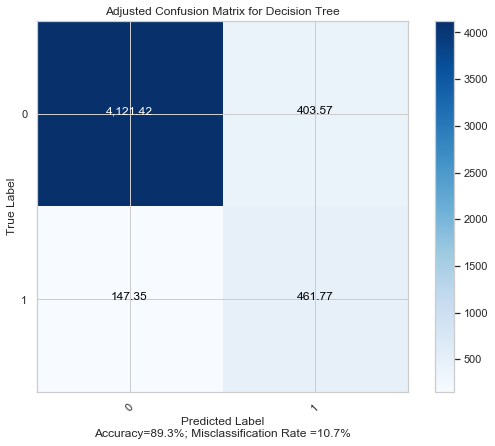

In [257]:
plot_confusion_matrix1(cm           = np.array([[4121.42,403.57],
                                                [147.35,461.77]]), 
                      normalize    = False,
                      target_names = ['0','1'],
                      title        = "Adjusted Confusion Matrix for Decision Tree")

* With PCA

In [232]:
dtreepca = DecisionTreeClassifier()
print("Decision Tree Classifier with PCA\n")
dtreepca.fit(x_train_pca, y_balanced)
train_score = dtreepca.score(x_train_pca, y_balanced)
train_scores.append(train_score)
test_score = dtreepca.score(x_test_pca, y_test_balanced)
y_prediction = dtreepca.predict(x_test_pca)
test_scores.append(test_score)
print("Training Accuracy: ",str(round(train_score*100,2))+"%")
print("Test Accuracy: ",str(round(test_score*100,2))+"%\n")
print("Classification Report:")
print(classification_report(y_test_balanced, y_prediction))

Decision Tree Classifier with PCA

Training Accuracy:  94.97%
Test Accuracy:  75.73%

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.90      0.79      2534
           1       0.86      0.61      0.72      2534

    accuracy                           0.76      5068
   macro avg       0.78      0.76      0.75      5068
weighted avg       0.78      0.76      0.75      5068



#### Model Selction

Out of all the above implemented models, Decision Tree classifier without PCA yields the best result in terms of accuracy. So, we select decision tree as our final model since we don't have any computing limitation and more oriented towards test accuracy.

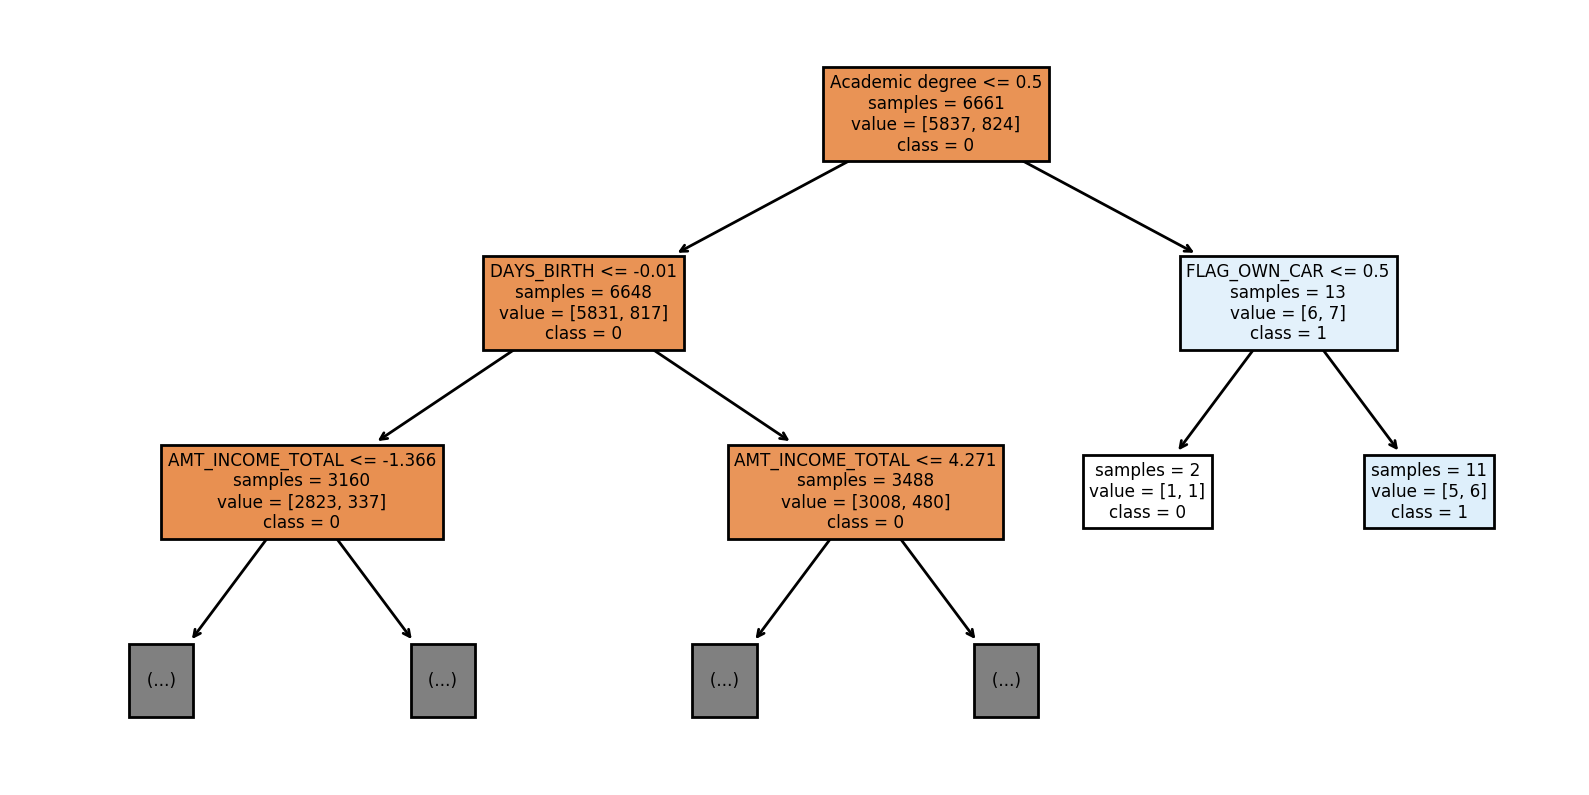

In [234]:
import matplotlib.pyplot as plt

classifier = DecisionTreeClassifier()
classifier.fit(x_train,y_train)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,5), dpi=200)
plot_tree(classifier, filled=True, feature_names=list(x.columns),class_names=['0','1'],impurity=False,max_depth=2)
plt.savefig('fid.png',dpi=300)
plt.show()

#### Improving the Model

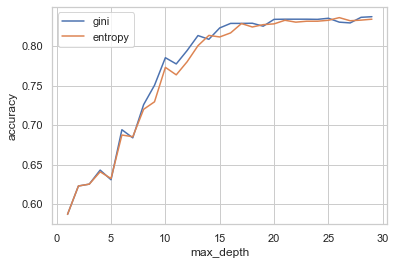

In [258]:
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,30):
    dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)
    dtree.fit(x_balanced,y_balanced)
    pred = dtree.predict(x_test_balanced)
    acc_gini.append(accuracy_score(y_test_balanced, pred))
    dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    dtree.fit(x_balanced, y_balanced)
    pred = dtree.predict(x_test_balanced)
    acc_entropy.append(accuracy_score(y_test_balanced, pred))
    max_depth.append(i)
    
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 'acc_entropy':pd.Series(acc_entropy),'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

In [239]:
path = dtreewpca.cost_complexity_pruning_path(x_balanced, y_balanced)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
clfs = []
ccp_alphas  = list(filter(lambda x : x > 0, ccp_alphas))
test_acc = []
train_acc = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(criterion='gini',ccp_alpha=ccp_alpha)
    clf.fit(x_balanced, y_balanced)
    clfs.append(clf)
    test_acc.append(clf.score(x_test_balanced,y_test_balanced))
    train_acc.append(clf.score(x_balanced, y_balanced))
    #print("CCP: ",ccp_alpha)
    #print("Training Acc.: ",clf.score(x_balanced, y_balanced))
    #print("Test Acc.: ",clf.score(x_test_balanced,y_test_balanced))
    #print("--------------------------")

In [240]:
ind = test_acc.index(max(test_acc))
print ("Improved Model Summary >> ")
print("Training Accuracy: ",train_acc[ind])
print("Testing Accuracy: ",test_acc[ind])
print("CCP_Alpha: ",ccp_alphas[ind])

Improved Model Summary >> 
Training Accuracy:  0.9496316600993661
Testing Accuracy:  0.840568271507498
CCP_Alpha:  3.569185083661699e-05


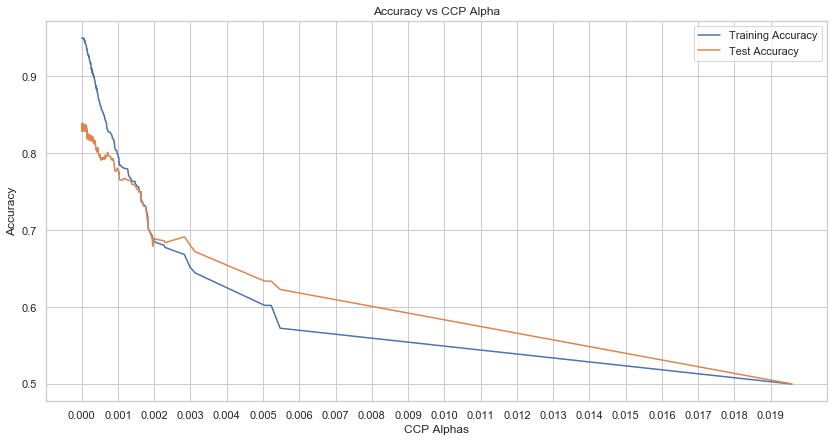

In [241]:
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
plt.figure(figsize=(14,7))
sns.lineplot(y=train_acc,x=ccp_alphas,label="Training Accuracy")
sns.lineplot(y=test_acc,x=ccp_alphas,label="Test Accuracy")
plt.xticks(ticks=np.arange(0.00,max(ccp_alphas),0.001))
plt.xlabel("CCP Alphas")
plt.ylabel("Accuracy")
plt.title("Accuracy vs CCP Alpha")
plt.savefig('pruning.png',dpi=300)
plt.show()

### Final Model

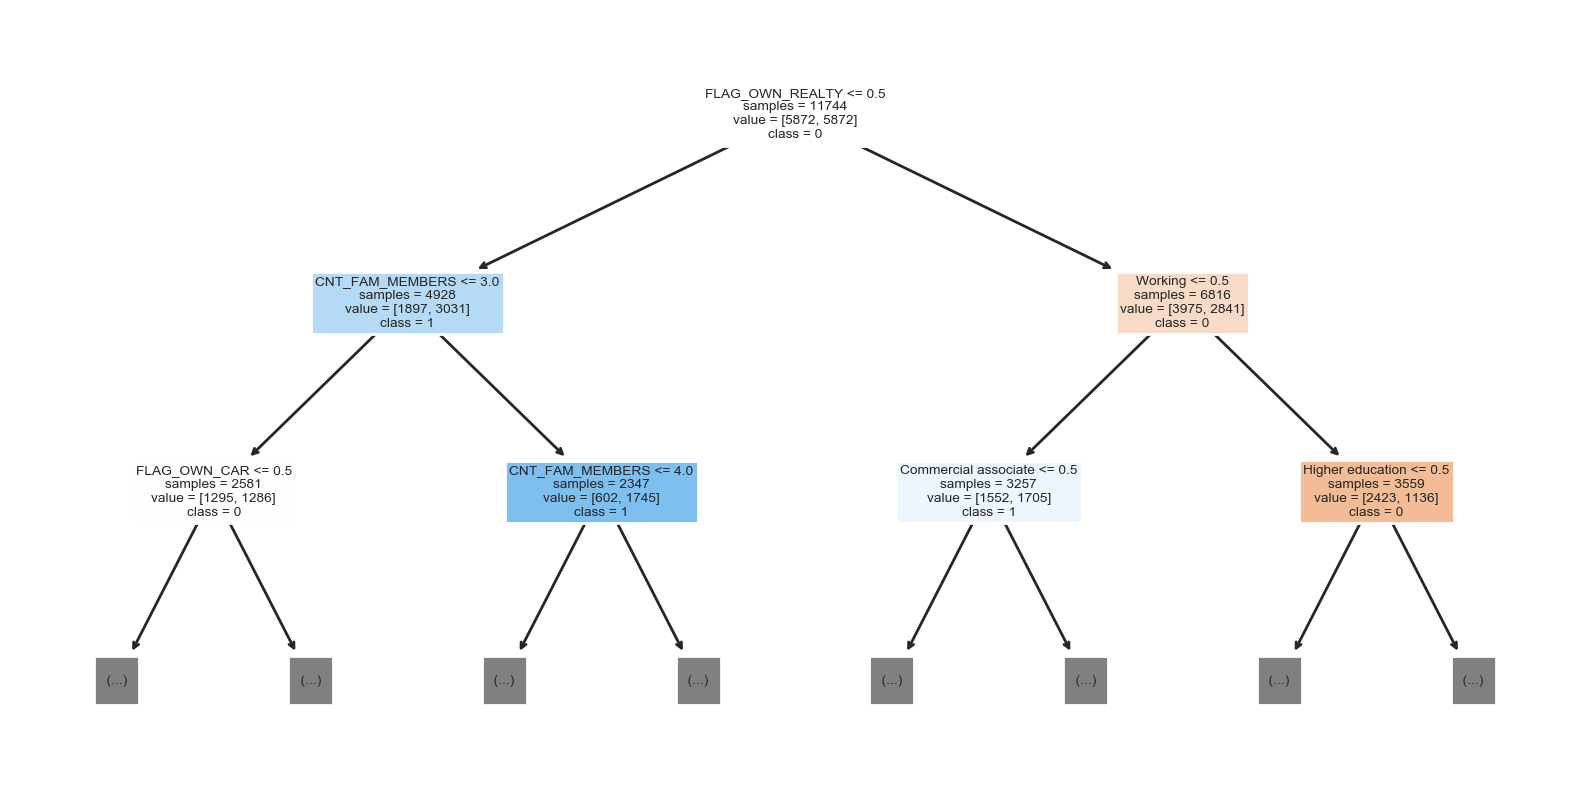

In [ ]:
import matplotlib.pyplot as plt

classifier = DecisionTreeClassifier(criterion='gini')
classifier.fit(x_balanced, y_balanced)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,5), dpi=200)
plot_tree(classifier, filled=True, feature_names=list(x.columns),class_names=['0','1'],impurity=False,max_depth=2)
plt.savefig('fid.png',dpi=300)
plt.show()

### Utility Functions

In [255]:
def plot_confusion_matrix1(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label\nAccuracy={:0.1f}%; Misclassification Rate ={:0.1f}%'.format(accuracy*100, misclass*100))
    plt.show()